# Lista 6
## Jakub Ciągło 275986

___
# Importy

In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad, fixed_quad
import pandas as pd
import matplotlib.pyplot as plt

___
# Zadanie 1
Metoda trapezów oblicza całkę numeryczną, dzieląc przedział prędkości od $1$ do $6$ na równe odcinki. W każdym odcinku wartości ciśnienia oblicza się za pomocą interpolacji liniowej. Następnie suma wartości $ \frac{v}{P} $ w każdym przedziale, podzielona przez 2, daje wynik dla metody trapezów. Całka pomnożona przez masę pozwala określić czas przejazdu. Wynik końcowy jest porównany z wynikiem uzyskanym za pomocą metod zaimplementowanych w SciPy.

In [2]:
v = np.array([0, 1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0]) 
P = np.array([0, 4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2]) 
P = P * 1000  
m = 2000 

def interpolacja_liniowa(x, xp, yp):
    for i in range(len(xp) - 1):
        if xp[i] <= x <= xp[i + 1]:
            return yp[i] + (yp[i + 1] - yp[i]) * (x - xp[i]) / (xp[i + 1] - xp[i])
    return None

def czas_trapezy(v, P, m, v1, v2):

    n = 1000  
    delta_v = (v2 - v1) / n
    integral = 0
    for i in range(n):
        v_left = v1 + i * delta_v
        v_right = v_left + delta_v
        P_left = interpolacja_liniowa(v_left, v, P)
        P_right = interpolacja_liniowa(v_right, v, P)
        integral += (v_left / P_left + v_right / P_right) * delta_v / 2

    return m * integral

def czas_scipy(v, P, m, v1, v2):
    P_interp = interp1d(v, P, kind='linear', fill_value='extrapolate')

    def integrand(velocity):
        return velocity / P_interp(velocity)

    integral, _ = quad(integrand, v1, v2)
    return m * integral

v1 = 1.0
v2 = 6.0

czas_wlasny = czas_trapezy(v, P, m, v1, v2)
czas_biblioteka = czas_scipy(v, P, m, v1, v2)

print(f'Czas obliczony samodzielnie zaimplementowaną funkcją: {czas_wlasny} s')
print(f'Czas obliczony funkcjami zaimplementowanymi w SciPy: {czas_biblioteka} s')


Czas obliczony samodzielnie zaimplementowaną funkcją: 1.2775036430029039 s
Czas obliczony funkcjami zaimplementowanymi w SciPy: 1.2775027108950958 s


___
# Zadanie 2
W tym zadaniu zaimplementowano metodę Simpsonów do obliczenia całki numerycznej. Metoda dzieli przedział na równe odcinki, a następnie oblicza całkę jako sumę wartości funkcji na węzłach, przeskalowaną przez odpowiedni współczynnik. Wykorzystuje do tego formułę $ \frac{h}{3} (f_{i-2} + 4 f_i + f_{i+1}) $.

In [3]:
def f(x): return np.cos(2 * np.arccos(x))

def simps(f, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)
    result = 0
    for i in range(2, len(x), 2):
        h = x[i] - x[i-1]
        result += h / 3 * (y[i-2] + 4 * y[i-1] + y[i])
    return result

a, b = -1, 1
nodes_list = [3, 5, 7]  

for nodes in nodes_list:
    result = simps(f, a, b, nodes)
    print(f'Liczba węzłów: {nodes}, Wynik: {result}')


Liczba węzłów: 3, Wynik: -0.6666666666666666
Liczba węzłów: 5, Wynik: -0.6666666666666665
Liczba węzłów: 7, Wynik: -0.6666666666666666



Oznaczmy $\theta = \arccos(x)$, czyli $\cos(\theta) = x$. Stąd:
$$
\cos(2 \arccos(x)) = \cos(2\theta)
$$
Korzystając ze wzoru $\cos(2\theta) = 2\cos^2(\theta) - 1$ otrzymujemy:
$$
\cos(2 \arccos(x)) = 2\cos^2(\theta) - 1
$$
Podstawiając $\cos^2(\theta) = x^2$ do wzoru, dostajemy wynik:
$$
f(x) = \cos(2 \arccos(x)) = 2x^2 - 1.
$$
Wiemy, że błąd metody Simpsona wynosi
$$
|E(f)| = \frac{(b-a)^5}{180n^4}f^{(4)}(x)
$$
Obliczamy pochodne naszej funkcji:
$$
\begin{align*}
f'(x) = 4x && f''(x) = 4 && f^{(3)}(x) = 0 && f^{(4)}(x) = 0
\end{align*}
$$
Zatem błąd tej metody w naszym przypadku wynosi 0 i dlatego, niezależnie od wyboru liczby węzłów, otrzymujemy ten sam wynik. Różnice wynikać mogą jedynie z przybliżeń komputera.


___
# Zadanie 3
Wykonujemy podstawienie:
$$
\begin{align*}
t = \frac{1}{x^3}, && x = t^{-\frac{1}{3}}, && dx = -\frac{t^{-\frac{4}{3}}}{3} \, dt \\
\end{align*}
$$
Po wykonaniu podstawienia nasze granice całkowania zmieniają się na $0$ i $1$. 
Całkę możemy więc zapisać następująco:
$$
\int_{0}^{1}  \frac{1}{1 + t^{-4/3}} \cdot \frac{1}{3 \cdot t^{4/3}}  \, dt
$$

W zadaniu zaimplementowano metodę trapezów do obliczenia całki numerycznej. Wartość całki obliczana jest poprzez podział przedziału na mniejsze części, wyznaczenie wartości funkcji w tych częściach, a następnie obliczenie sumy, która przybliża całkę. Przy wykonywaniu obliczeń wykorzystano liczbę $\epsilon$ zamiast $0$, ponieważ niemożliwe byłoby dzielnie przez $0$.

In [4]:
def trapezy(f, a, b, n):
    x = np.linspace(a, b, n + 1)
    y = f(x)
    h = (b - a) / n
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    return integral

def function_transformed(t):
    return (1 / (1 + (t ** (-4 / 3)))) * (1 / (3 * t ** (4 / 3)))

epsilon = 1e-16
a, b = epsilon, 1 
n = 6 - 1  

result = trapezy(function_transformed, a, b, n)

print(f'Wynik całki metodą trapezów: {result}')


Wynik całki metodą trapezów: 0.2436983040442973


___
# Zadanie 4
W tym zadaniu zaimplementowano obliczanie harmonicznej długości kąta za pomocą metody trapezów i porównano wyniki z obliczeniami z wykorzystaniem funkcji `quad` z biblioteki SciPy. Funkcja `h(theta0)` oblicza wartość dla podanego kąta `theta0`, stosując metodę trapezów. Obliczone wartości dla różnych kątów `theta` porównano z przybliżeniem harmonicznym $h(0) = \frac{\pi}{2}$. Różnice między otrzymanymi wartościami, a przybliżeniem przedstawiono na wykresie.

Przybliżenie harmoniczne: h(0) = 1.5707963267948966

Wartości h obliczone za pomocą samodzielnie zaimplementowanej metody:
h(15°) = 1.5775516607636666
h(30°) = 1.5981420021125403
h(45°) = 1.6335863074581478

Wartości h obliczone za pomocą biblioteki SciPy:
h(15°) = 1.5775516607636662
h(30°) = 1.5981420021125399
h(45°) = 1.6335863074581476


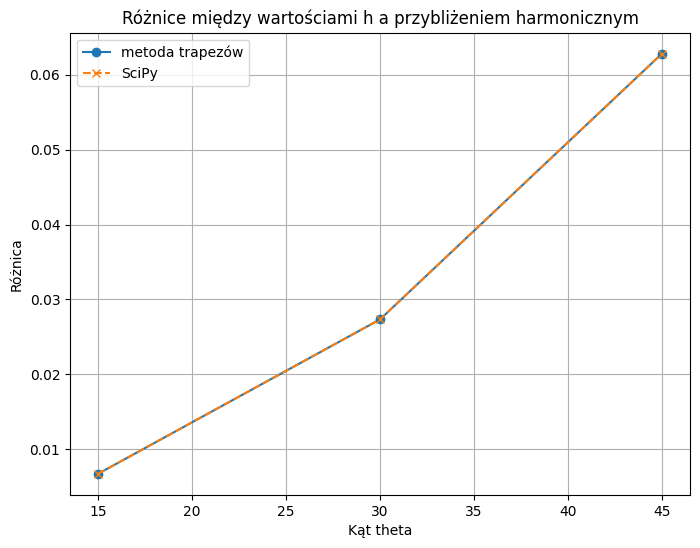

In [5]:
def h(theta0):
    theta0_rad = np.radians(theta0)

    def function(theta):
        return 1 / np.sqrt(1 - (np.sin(theta0_rad / 2)**2) * (np.sin(theta)**2))

    def trapezy(f, a, b, n):
        x = np.linspace(a, b, n + 1)
        y = f(x)
        h = (b - a) / n
        integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
        return integral

    n = 1000
    return trapezy(function, 0, np.pi / 2, n)

def h_scipy(theta0):
    theta0_rad = np.radians(theta0)

    def function(theta):
        return 1 / np.sqrt(1 - (np.sin(theta0_rad / 2)**2) * (np.sin(theta)**2))

    integral, _ = quad(function, 0, np.pi / 2)
    return integral

theta_values = [15, 30, 45]
h_values = {theta: h(theta) for theta in theta_values}
h_values_scipy = {theta: h_scipy(theta) for theta in theta_values}
h_approx = np.pi / 2

print(f'Przybliżenie harmoniczne: h(0) = {h_approx}')

print('\nWartości h obliczone za pomocą samodzielnie zaimplementowanej metody:')
for theta, value in h_values.items():
    print(f'h({theta}°) = {value}')

print('\nWartości h obliczone za pomocą biblioteki SciPy:')
for theta, value in h_values_scipy.items():
    print(f'h({theta}°) = {value}')

differences = [value - h_approx for value in h_values.values()]
differences_scipy = [value - h_approx for value in h_values_scipy.values()]

plt.figure(figsize=(8, 6))
plt.plot(theta_values, differences, label='metoda trapezów', marker='o')
plt.plot(theta_values, differences_scipy, label='SciPy', linestyle='--', marker='x')
plt.title('Różnice między wartościami h a przybliżeniem harmonicznym')
plt.xlabel('Kąt theta')
plt.ylabel('Różnica')
plt.legend()
plt.grid(True)
plt.show()


___
# Zadanie 5
W zadaniu zaimplementowano metodę Gaussa-Legendre’a do numerycznego obliczania całki. Funkcja `gauss_legendre` oblicza całkę dla podanego przedziału $[a, b]$ i liczby węzłów $n$. Wykorzystuje ona węzły i wagi Gaussa-Legendre’a, a następnie oblicza wartość funkcji $f(x)$ w tych węzłach i sumuje wyniki, przeskalowane przez odpowiednie wagi. Porównano wyniki metody implementowanej ręcznie dla 2 oraz 4 węzłów z wynikami obliczonymi za pomocą funkcji `fixed_quad` z biblioteki SciPy.

In [6]:
def f(x):
    return np.log(x) / (x**2 - 2*x + 2)

def gauss_legendre(a, b, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)

    integral = 0
    for i in range(n):
        x = 0.5 * (b - a) * nodes[i] + 0.5 * (a + b)
        integral += weights[i] * f(x)
    return 0.5 * (b - a) * integral

a, b = 1, np.pi

result_2_nodes = gauss_legendre(a, b, 2)
result_4_nodes = gauss_legendre(a, b, 4)

print(f"Wynik obliczony metodą Gaussa-Legendre'a zaimplementowaną samodzielnie dla 2 węzłów: {result_2_nodes}")
print(f"Wynik obliczony metodą Gaussa-Legendre'a zaimplementowaną samodzielnie dla 4 węzłów: {result_4_nodes}")

result_2_nodes_scipy = fixed_quad(f, a, b, n=2)[0]
result_4_nodes_scipy = fixed_quad(f, a, b, n=4)[0]

print(f"\nWynik obliczony metodą Gaussa-Legendre'a zaimplementowaną w SciPy dla 2 węzłów: {result_2_nodes_scipy}")
print(f"Wynik obliczony metodą Gaussa-Legendre'a zaimplementowaną w SciPy dla 4 węzłów:: {result_4_nodes_scipy}")


Wynik obliczony metodą Gaussa-Legendre'a zaimplementowaną samodzielnie dla 2 węzłów: 0.6067250228624488
Wynik obliczony metodą Gaussa-Legendre'a zaimplementowaną samodzielnie dla 4 węzłów: 0.5847680362127091

Wynik obliczony metodą Gaussa-Legendre'a zaimplementowaną w SciPy dla 2 węzłów: 0.6067250228624488
Wynik obliczony metodą Gaussa-Legendre'a zaimplementowaną w SciPy dla 4 węzłów:: 0.5847680362127091


___
# Zadanie 6
W zadaniu zaimplementowano obliczanie pochodnych funkcji w podanych punktach, korzystając z  metod: różnicy "do przodu " rzędu 1 (Df1),  różnicy centalnej rzędu 2 (Dc2) oraz różnicy centralnej rzędu 4 (Dc4). Obliczono  przybliżone wartości, porównując je z dokładnymi wynikami. Zebrane dane zostały umieszczone w tabeli.

In [17]:
def f1(x): return x**3 - 2*x

def f2(x): return np.sin(x)

def f3(x): return np.exp(x)

def Df1(f, x, h):
    return (f(x + h) - f(x)) / h

def Dc2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def Dc4(f, x, h):
    result = 4 * Dc2(f, x, h) - Dc2(f, x, 2 * h)
    return result / 3

points = [(f1, 1), (f2, np.pi / 3), (f3, 0)]
h_values = [0.1, 0.01, 0.001]

results = {
    'Pochodne': [],
    'h': [],
    "f'(x) - Df1": [],
    "f'(x) - Dc2": [],
    "f'(x) - Dc4": []
}

for func, x in points:
    for h in h_values:
        exact_derivative = {f1: 1, f2: 1 / 2, f3: 1}[func]
        results['Pochodne'].append(f"{func.__name__}' = {exact_derivative}")
        results['h'].append(f"{h}")
        results["f'(x) - Df1"].append(f'{abs(exact_derivative - Df1(func, x, h)):.4e}')
        results["f'(x) - Dc2"].append(f'{abs(exact_derivative - Dc2(func, x, h)):.4e}')
        results["f'(x) - Dc4"].append(f'{abs(exact_derivative - Dc4(func, x, h)):.4e}')

df = pd.DataFrame(results)

styled_df = df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'gray'), ('border', '1px solid white')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid white')]},
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%'), ('border', '1px solid white')]},
]).hide(axis='index')

styled_df


Pochodne,h,f'(x) - Df1,f'(x) - Dc2,f'(x) - Dc4
f1' = 1,0.1,3.1000e-01,1.0000e-02,1.1102e-15
f1' = 1,0.01,3.0100e-02,1.0000e-04,4.6629e-15
f1' = 1,0.001,3.0010e-03,1.0000e-06,3.6082e-14
f2' = 0.5,0.1,4.4098e-02,8.3292e-04,1.6647e-06
f2' = 0.5,0.01,4.3384e-03,8.3333e-06,1.6666e-10
f2' = 0.5,0.001,4.3310e-04,8.3333e-08,1.1058e-13
f3' = 1,0.1,5.1709e-02,1.6675e-03,3.3373e-06
f3' = 1,0.01,5.0167e-03,1.6667e-05,3.3335e-10
f3' = 1,0.001,5.0017e-04,1.6667e-07,2.6978e-14


____
# Metoda Lagrange'a do zadań 7 i 8.
Kod implementuje interpolację wielomianową oraz operacje na wielomianach. Funkcja `poly_interpol` oblicza współczynniki wielomianu przechodzącego przez zadane punkty, wykorzystując formę Lagrange’a. Dla każdego punktu generuje wielomian bazowy, mnoży go przez wartość funkcji w tym punkcie, a następnie sumuje wyniki, tworząc końcowy wielomian interpolacyjny. Funkcja korzysta z pomocniczych metod do mnożenia i skalowania wielomianów. Kod zawiera także funkcje do obliczania pochodnej wielomianu oraz jego wartości dla podanego argumentu.

In [55]:
def poly_interpol(x, y):
    n = len(x)
    poly_coeffs = [0] * n

    for i in range(n):
        w = [1]
        for j in range(n):
            if i != j:
                w = multiply_polynomials(w, [-x[j], 1])
                w = scale_polynomial(w, 1 / (x[i] - x[j]))

        for k in range(len(w)):
            poly_coeffs[k] += w[k] * y[i]

    return poly_coeffs

def multiply_polynomials(p1, p2):
    result = [0] * (len(p1) + len(p2) - 1)
    for i in range(len(p1)):
        for j in range(len(p2)):
            result[i + j] += p1[i] * p2[j]
    return result

def scale_polynomial(poly, scalar):
    return [coef * scalar for coef in poly]

def derivative_polynomial(coeffs):
    n = len(coeffs)
    derivative = [0] * (n - 1)
    for i in range(1, n):
        derivative[i - 1] = coeffs[i] * i
    return derivative

def evaluate_polynomial(coeffs, x):
    result = 0
    for i, coef in enumerate(coeffs):
        result += coef * (x ** i)
    return result

___
# Zadanie 7
Funkcja `poly_interpol` generuje współczynniki wielomianu interpolacyjnego. Następnie pochodna tego wielomianu jest wyznaczana za pomocą funkcji `derivative_polynomial`.
Obliczana jest wartość pochodnej w punkcie $ x = 0.2 $. Dla wizualizacji generowane są wartości funkcji oraz jej pochodnej w przedziale $ x \in [0, 0.4] $. 

f'(0.2) = 0.5596358333333293


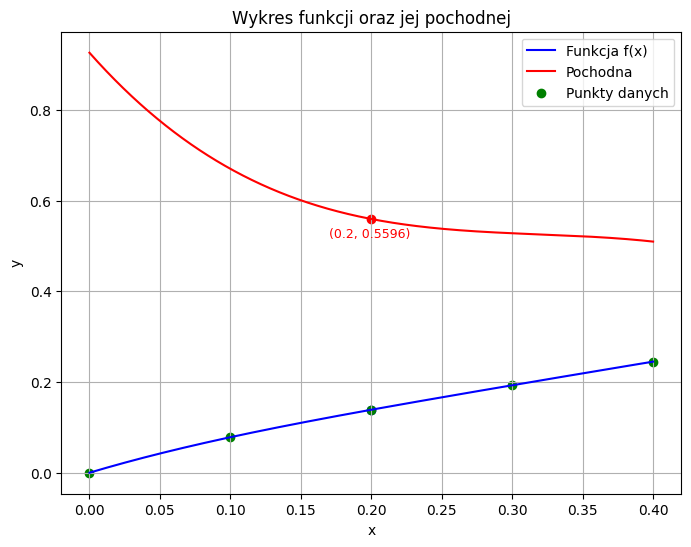

In [80]:
xp = [0.0, 0.1, 0.2, 0.3, 0.4]
yp = [0.00000, 0.078348, 0.138910, 0.192916, 0.244981]

poly_coeffs = poly_interpol(xp, yp)
poly_prime_coeffs = derivative_polynomial(poly_coeffs)

f_prime = evaluate_polynomial(poly_prime_coeffs, 0.2)
print(f"f'(0.2) = {f_prime}")

x_vals = np.linspace(0, 0.4, 1000)
y_vals = [evaluate_polynomial(poly_coeffs, x) for x in x_vals]
y_prime_vals = [evaluate_polynomial(poly_prime_coeffs, x) for x in x_vals]

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Funkcja f(x)', color='blue')
plt.plot(x_vals, y_prime_vals, label='Pochodna', color='red')
plt.scatter(0.2, evaluate_polynomial(poly_coeffs, 0.2), color='blue')
plt.scatter(0.2, f_prime, color='red')
plt.text(0.17, f_prime -0.04, f'({0.2}, {f_prime:.4f})', fontsize=9, color='red')

plt.scatter(xp, yp, color='green', label='Punkty danych')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres funkcji oraz jej pochodnej')
plt.grid(True)
plt.show()

___
# Zadanie 8
W zadaniu, korzystając z obliczonych współczynników, wyznaczane są pierwsza i druga pochodna wielomianu przy pomocy funkcji `derivative_polynomial`. Na koniec program oblicza wartości pochodnych w zerze, czyli $ f'(0)$ i $ f''(0) $, korzystając z funkcji `evaluate_polynomial`. Wynik ilustruje, jak zmienia się wartość funkcji oraz jej nachylenie i krzywizna w wybranym punkcie.

Wyniki uzyskane z interpolacji wielomianowej:
f'(0) = -8.56
f''(0) = -0.5999999999999989


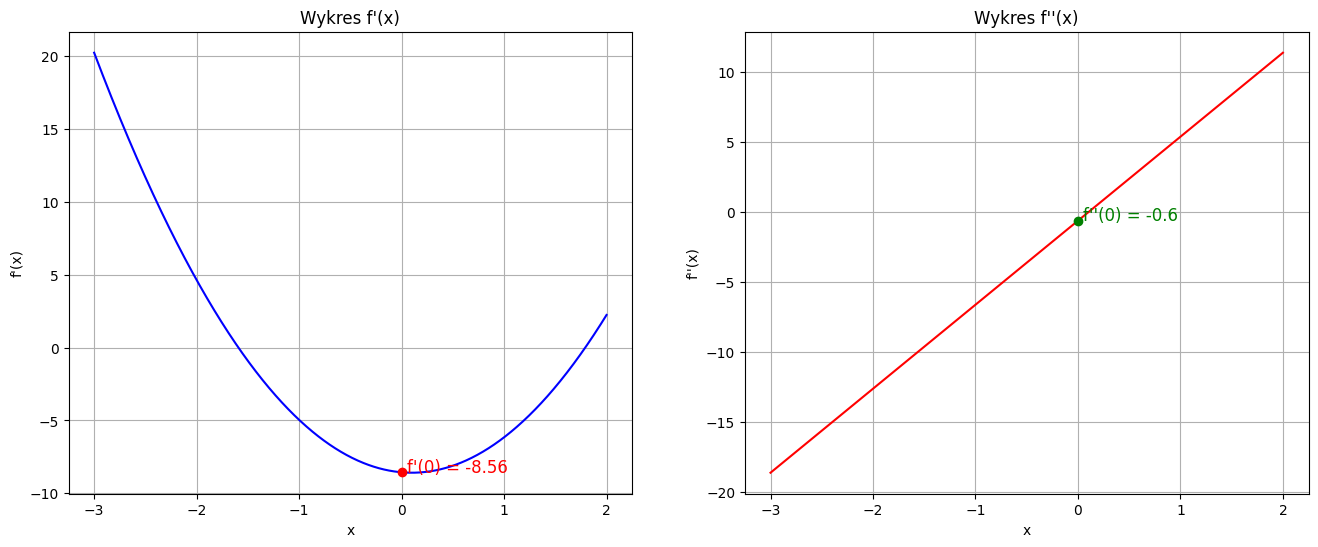

In [81]:
xs = [-2.2, -0.3, 0.8, 1.9]
ys = [15.180, 10.962, 1.920, -2.040]

poly_coeffs = poly_interpol(xs, ys)
poly_prime_coeffs = derivative_polynomial(poly_coeffs)
poly_bis_coeffs = derivative_polynomial(poly_prime_coeffs)

f_prime_at_0 = evaluate_polynomial(poly_prime_coeffs, 0)
f_bis_at_0 = evaluate_polynomial(poly_bis_coeffs, 0)

print("Wyniki uzyskane z interpolacji wielomianowej:")
print(f"f'(0) = {f_prime_at_0}")
print(f"f''(0) = {f_bis_at_0}")

x_vals = np.linspace(-3, 2, 1000)

y_prime_vals = [evaluate_polynomial(poly_prime_coeffs, x) for x in x_vals]
y_bis_vals = [evaluate_polynomial(poly_bis_coeffs, x) for x in x_vals]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_prime_vals, color='blue')
plt.scatter(0, f_prime_at_0, color='red', zorder=5)
plt.text(0.05, f_prime_at_0, f"f'(0) = {f_prime_at_0:.2f}", color='red', fontsize=12)
plt.title("Wykres f'(x)")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_vals, y_bis_vals, color='red')
plt.scatter(0, f_bis_at_0, color='green', zorder=5)
plt.text(0.05, f_bis_at_0, f"f''(0) = {f_bis_at_0:.1f}", color='green', fontsize=12)
plt.title("Wykres f''(x)")
plt.xlabel('x')
plt.ylabel("f''(x)")
plt.grid(True)

plt.show()